# Cluster data with k-Means


Load in DataFrame with parameters and principle components of correlation plots.

Within the K-Means algorithm a pre-defined number of cluster centers are positioned randomly in the high-dimensional parameter space. Then the each data point is assigned to the nearest cluster center. The mean of all point in a cluster will be the new cluster center. This procedure is done with all clusters and repeated until convergence is reached.

- There is a dependence on initial random points.
- The clusters will be spherical-like

In [7]:
import pandas as pd
from sklearn.cluster import KMeans

In [3]:
df_pca = pd.read_pickle('df_main.p')
display(df_pca.head())
df_pca.shape

,gBB,gCC,gAB,gAC,gBC,path,pca comp 1,pca comp 2,pca comp 3,pca comp 4,pca comp 5,pca comp 6,pca comp 7,pca comp 8,pca comp 9,pca comp 10
0,-1.0,-1.0,-1.0,-1.0,-1.0,data/batch_001/run_00001,-105.659465,37.965591,75.525219,0.440110,71.498446,-6.941616,-0.005033,24.897444,-19.683921,1.891975
1,-1.0,-1.0,-1.0,-1.0,-0.8,data/batch_001/run_00002,-102.790897,32.000799,59.039534,0.308656,49.503230,-9.023706,0.041075,15.930131,-10.015480,0.990542
2,-1.0,-1.0,-1.0,-1.0,-0.6,data/batch_001/run_00003,-98.020880,24.320418,41.510031,0.182524,29.262609,-9.871892,0.070699,8.940829,-2.802803,0.314344
3,-1.0,-1.0,-1.0,-1.0,-0.4,data/batch_001/run_00004,-90.632865,14.695513,23.230042,0.067592,11.804668,-9.495908,0.081263,4.117469,1.445592,-0.088344
4,-1.0,-1.0,-1.0,-1.0,-0.2,data/batch_001/run_00005,-79.346890,4.165145,4.233191,-0.034407,-0.536990,-8.301869,0.071124,1.586937,2.300852,-0.179525


(18014, 16)

In [5]:
features = df_pca.iloc[:, 6:]
features.head()

,pca comp 1,pca comp 2,pca comp 3,pca comp 4,pca comp 5,pca comp 6,pca comp 7,pca comp 8,pca comp 9,pca comp 10
0,-105.659465,37.965591,75.525219,0.440110,71.498446,-6.941616,-0.005033,24.897444,-19.683921,1.891975
1,-102.790897,32.000799,59.039534,0.308656,49.503230,-9.023706,0.041075,15.930131,-10.015480,0.990542
2,-98.020880,24.320418,41.510031,0.182524,29.262609,-9.871892,0.070699,8.940829,-2.802803,0.314344
3,-90.632865,14.695513,23.230042,0.067592,11.804668,-9.495908,0.081263,4.117469,1.445592,-0.088344
4,-79.346890,4.165145,4.233191,-0.034407,-0.536990,-8.301869,0.071124,1.586937,2.300852,-0.179525


## Determine best number of cluster


The score is within-cluster sum of squares

In [8]:
wcss = []  # create a list to hold the within-cluster sum of squares values
for number_of_clusters in range(1, 10):  # we have to start with at least one cluster. 9 is plenty for this dataset
    model = KMeans(n_clusters=number_of_clusters, random_state=0)  # instantiate KMeans with the number of clusters. Use random_state to make scores reproducible
    model.fit(features)  # search for good cluster centers
    wcss.append(model.score(features))

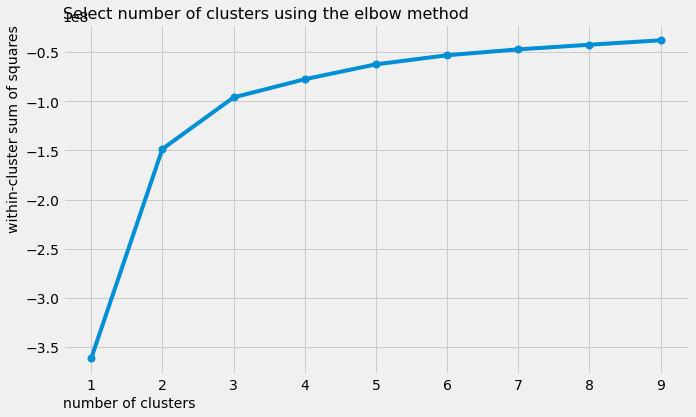

In [9]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')  # use styling for a nice plot

# create figure and axis and plot the scores
fig, ax = plt.subplots(figsize=[10, 6])
ax.plot(range(1, 10), wcss, marker='o', markersize=7)  # use big markers to see which number of clusters is best

# set title and labels of the plot
ax.set_title('Select number of clusters using the elbow method', size=16, loc='left')
ax.set_xlabel(xlabel='number of clusters',
              position=[0, 0],
              horizontalalignment='left',
              size=14)
ax.set_ylabel(ylabel='within-cluster sum of squares',
              position=[0, 1],
              horizontalalignment='right',
              size=14);